In [65]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math
#import sklearn as sk
from sklearn.model_selection import train_test_split

In [66]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data (2).csv


In [77]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [78]:
df3=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [79]:
df = df.assign(NON_TYPABLE=df['serotype']=='NON TYPABLE')

In [80]:
df.NON_TYPABLE = df.NON_TYPABLE.replace({True: 1, False: 0})

In [81]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)
df

,UniqueID,year,month,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date,Hospital Duration,organism,serotype,NON_TYPABLE
0,1100136100,2009,Jul,21-Jul-09,21,Very sever disease,NaN,DHAKA,Discharge,27-Jul-09,6,Streptococcus pneumoniae,1,0
2,1100432100,2009,Aug,21-Aug-09,27,Enteric fever,NaN,"151 B,R-1,SHAKHERTEK,MOHAMMADPUR,DHAKA",Discharge,26-Aug-09,5,Streptococcus pneumoniae,NTD,0
4,1100703100,2009,Sep,12-Sep-09,3,Meningitis,NaN,"RUHITPUR,KERANIGANJ",DORB,26-Sep-09,14,Streptococcus pneumoniae,2,0
6,1500006300,2009,Oct,2-Oct-09,69,Meningitis,NaN,"JATRABARI,DHAKA",Discharge,11-Oct-09,9,Streptococcus pneumoniae,1,0
8,1101205100,2009,Nov,8-Nov-09,5,Meningitis,NaN,DHAKA,Discharge,22-Nov-09,14,Streptococcus pneumoniae,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,1070003143,2022,Jan,8-Jan-22,1,Meningitis,DHAKA,NaN,Discharge,1-Feb-22,24,Streptococcus pneumoniae,5,0
785,1070003144,2022,Jan,22-Jan-22,80,Not Eligible,DHAKA,NaN,Discharge,5-Feb-22,14,Streptococcus pneumoniae,1,0
786,1070003191,2022,Jan,30-Jan-22,84,Not Eligible,NARSINGDI,NaN,Discharge,14-Feb-22,15,Streptococcus pneumoniae,1,0
787,1070003270,2022,Feb,9-Feb-22,75,Not Eligible,MANIKGANJ,NaN,Discharge,24-Feb-22,15,Streptococcus pneumoniae,1,0


In [82]:
by_comp = df.groupby("year")
df2=by_comp.sum()
df2

,UniqueID,Age (month),Hospital Duration,NON_TYPABLE
year,,,,
2009,10308213100,206,129,0
2010,60018249100,758,835,0
2011,102856953505,1147,1289,1
2012,63417430205,1678,824,0
2013,98892259905,2438,1287,0
2014,72360314790,1883,806,0
2015,101279622504,3751,1376,0
2016,61664422884,2624,879,0
2017,62783093918,2224,870,0


In [83]:
plt.rcParams['figure.figsize'] = [40,20]

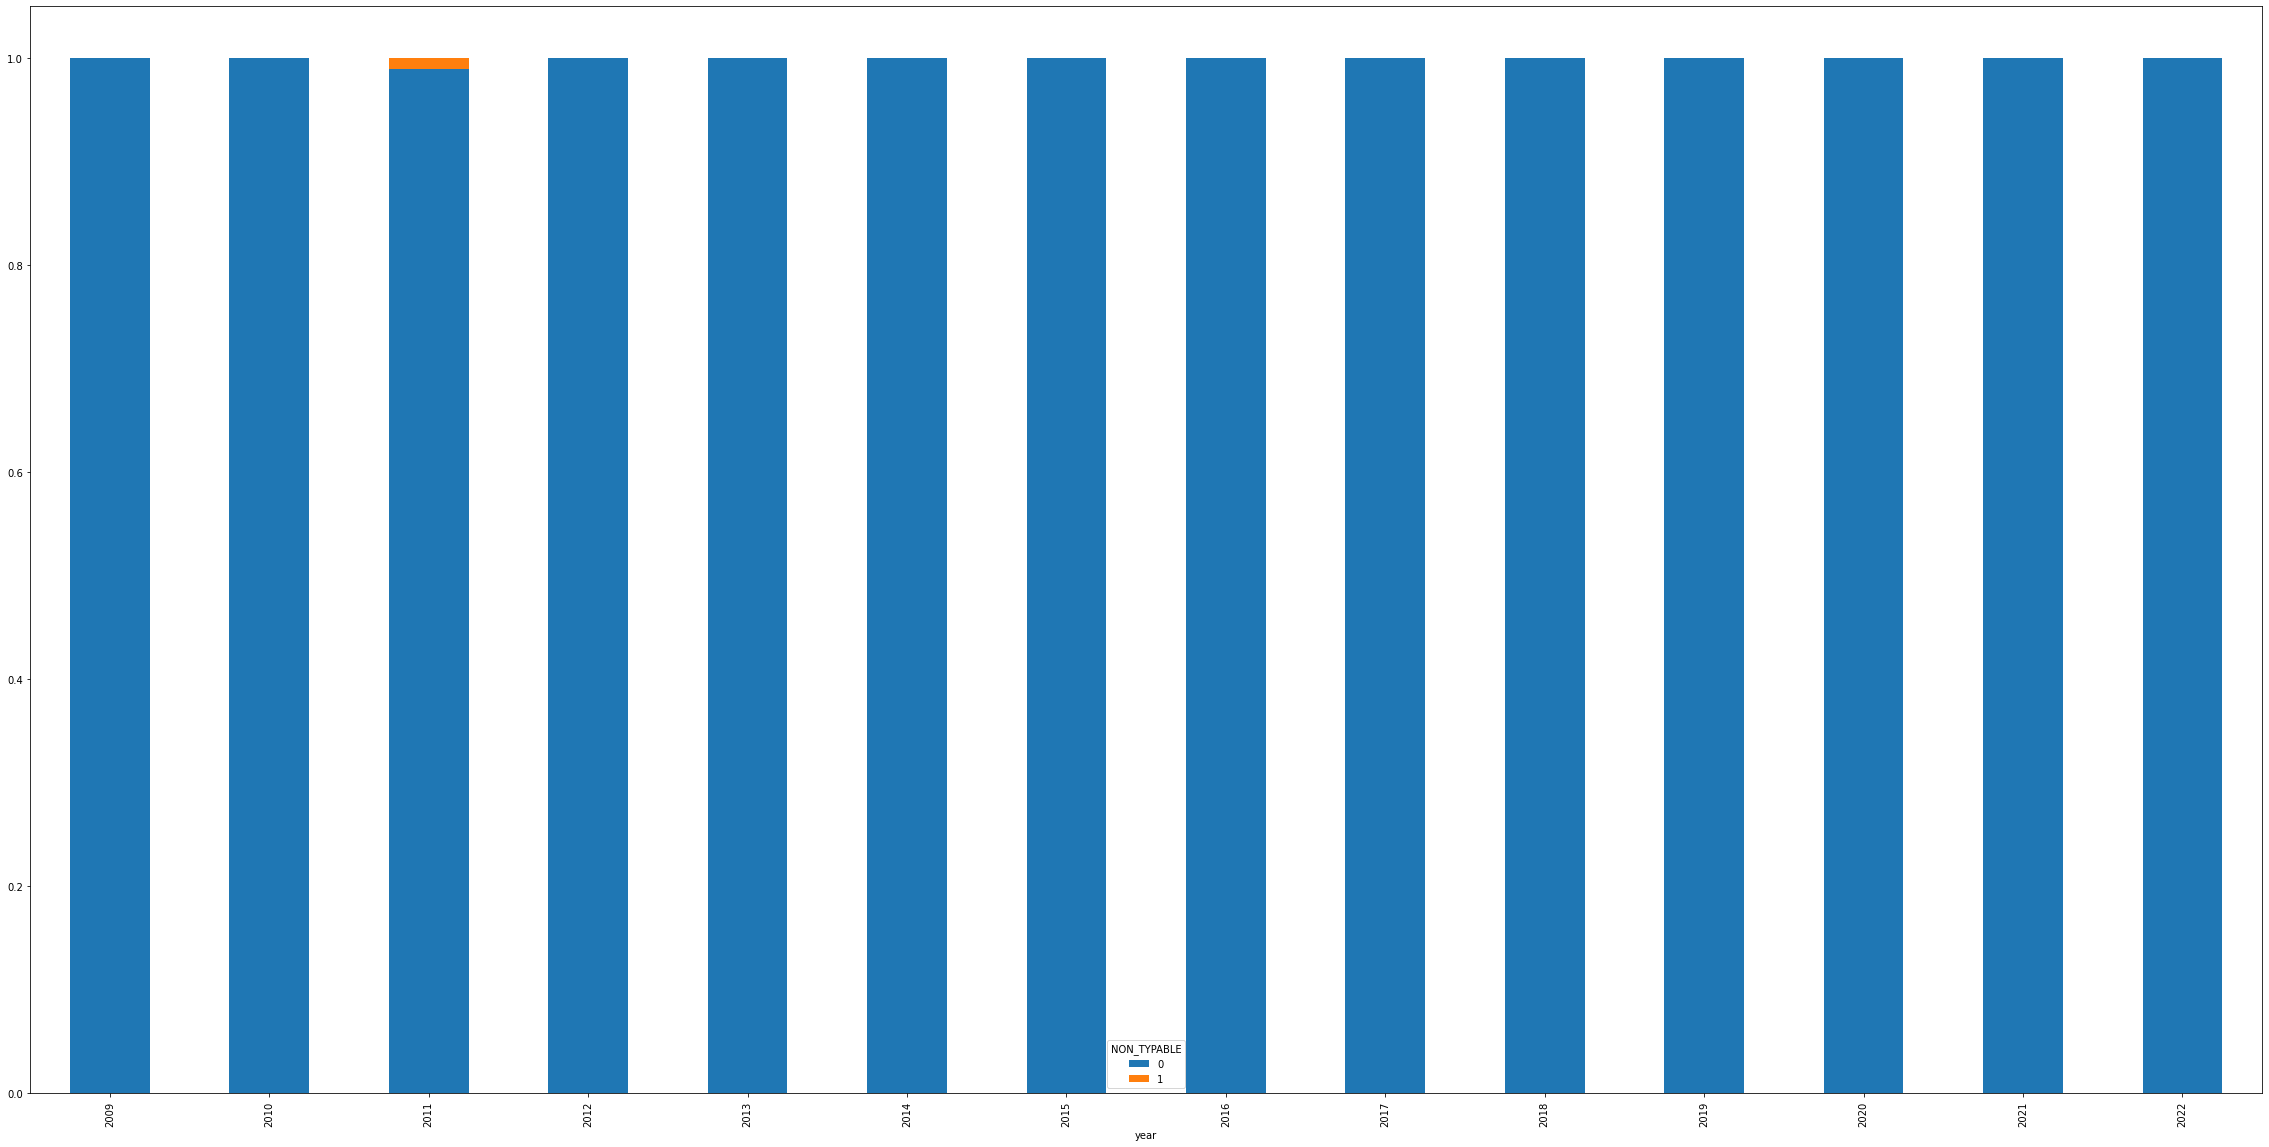

In [84]:
df.groupby('year')['NON_TYPABLE'].value_counts(normalize=True).unstack('NON_TYPABLE').plot.bar(stacked=True)

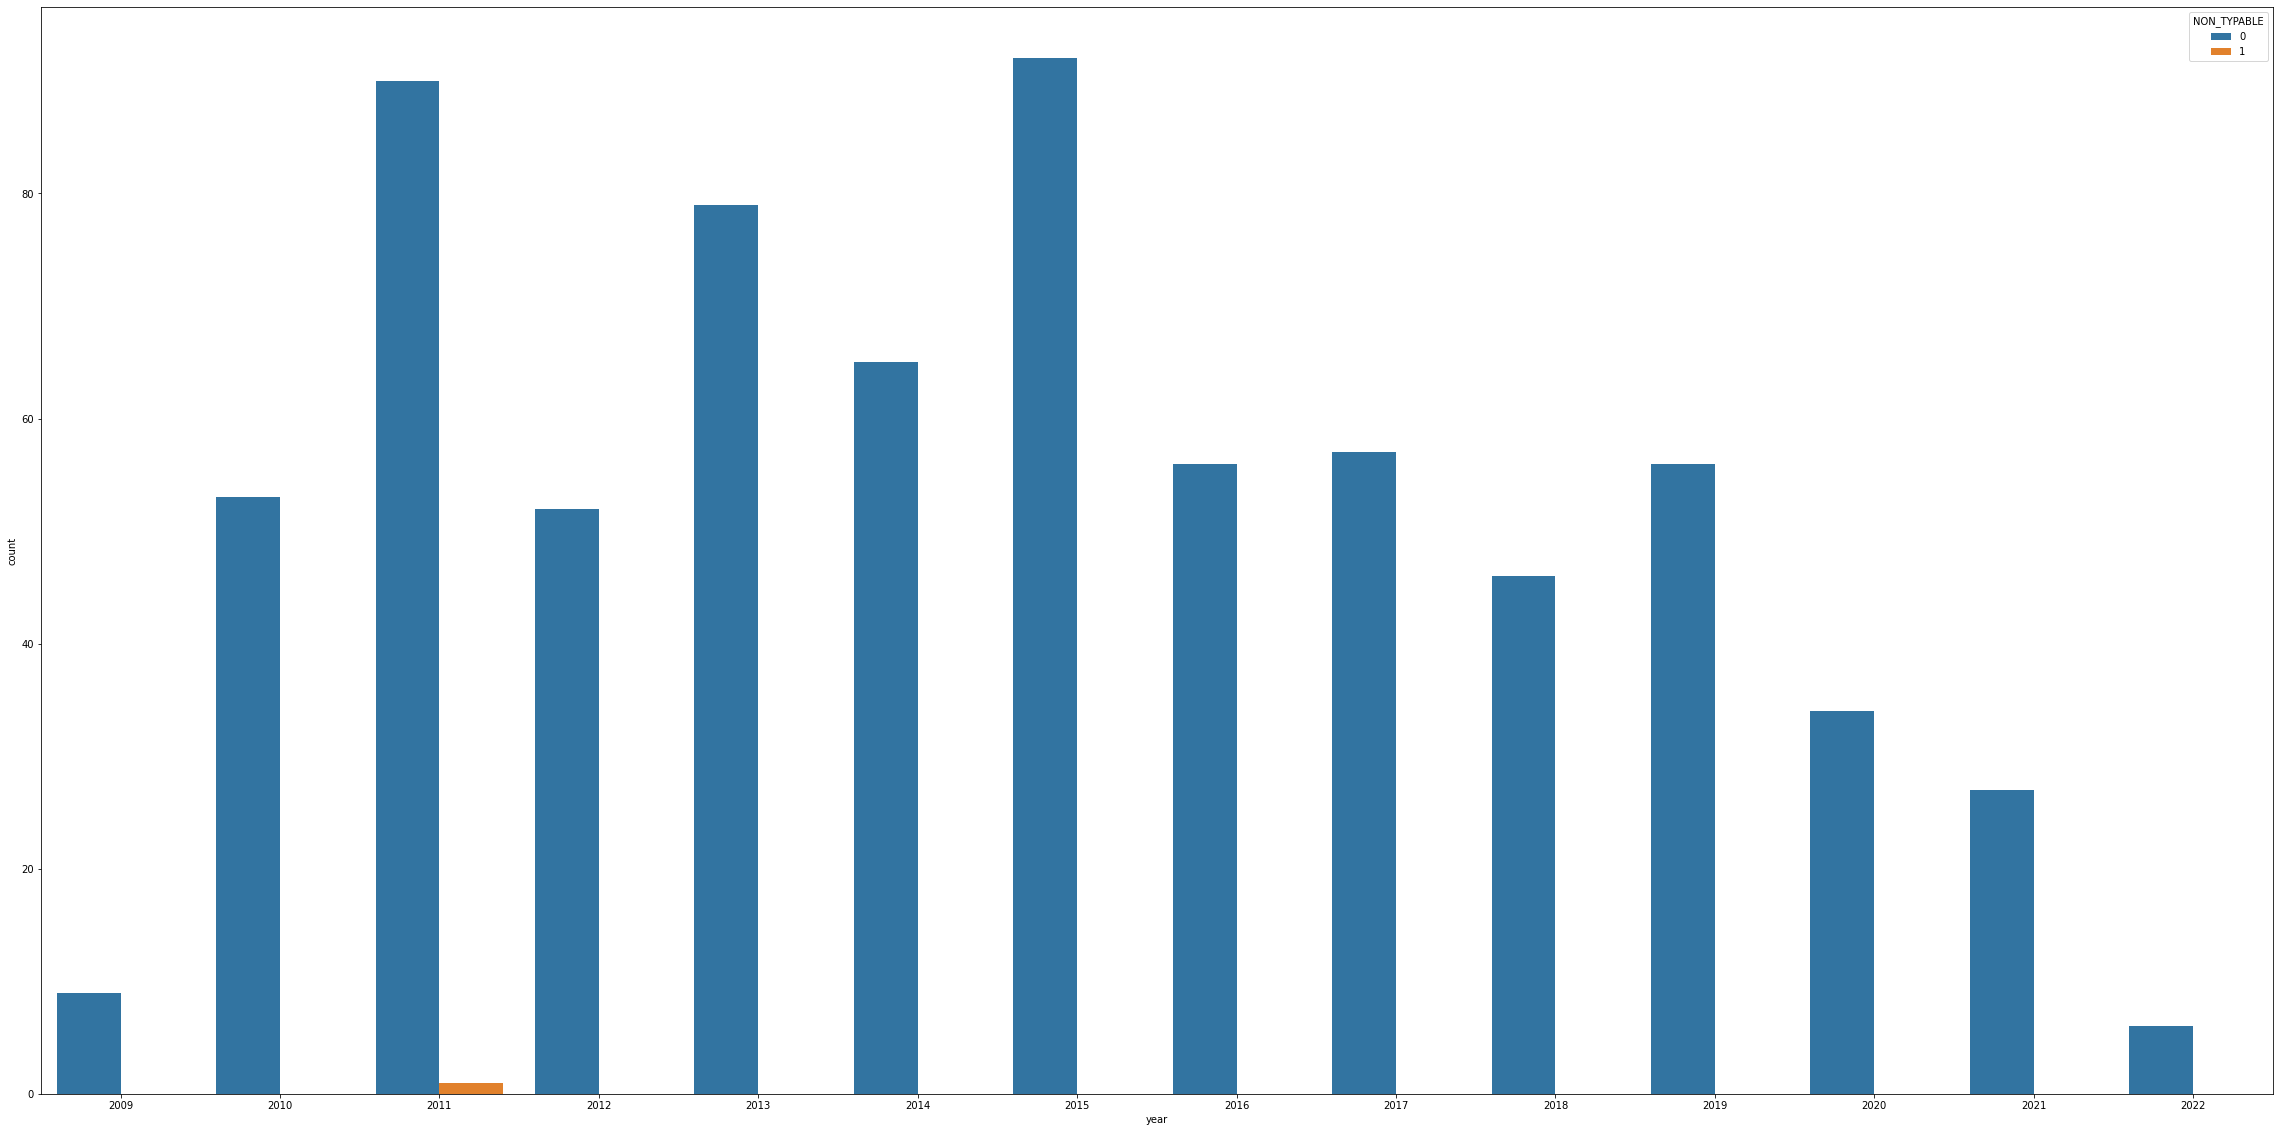

In [85]:
sns.countplot(x='year',hue='NON_TYPABLE',data=df)

In [88]:
df3.drop(df3[df3['year'] == 2009].index, inplace = True)
df3.drop(df3[df3['year'] == 2010].index, inplace = True)
df3.drop(df3[df3['year'] == 2012].index, inplace = True)
df3.drop(df3[df3['year'] == 2013].index, inplace = True)
df3.drop(df3[df3['year'] == 2014].index, inplace = True)
df3.drop(df3[df3['year'] == 2015].index, inplace = True)
df3.drop(df3[df3['year'] == 2016].index, inplace = True)
df3.drop(df3[df3['year'] == 2017].index, inplace = True)
df3.drop(df3[df3['year'] == 2018].index, inplace = True)
df3.drop(df3[df3['year'] == 2019].index, inplace = True)
df3.drop(df3[df3['year'] == 2020].index, inplace = True)
df3.drop(df3[df3['year'] == 2021].index, inplace = True)
df3.drop(df3[df3['year'] == 2022].index, inplace = True)
df3 = df3.assign(NON_TYPABLE=df['serotype']=='NON_TYPABLE')
df3.NON_TYPABLE = df3.NON_TYPABLE.replace({True: 1, False: 0})
#df3

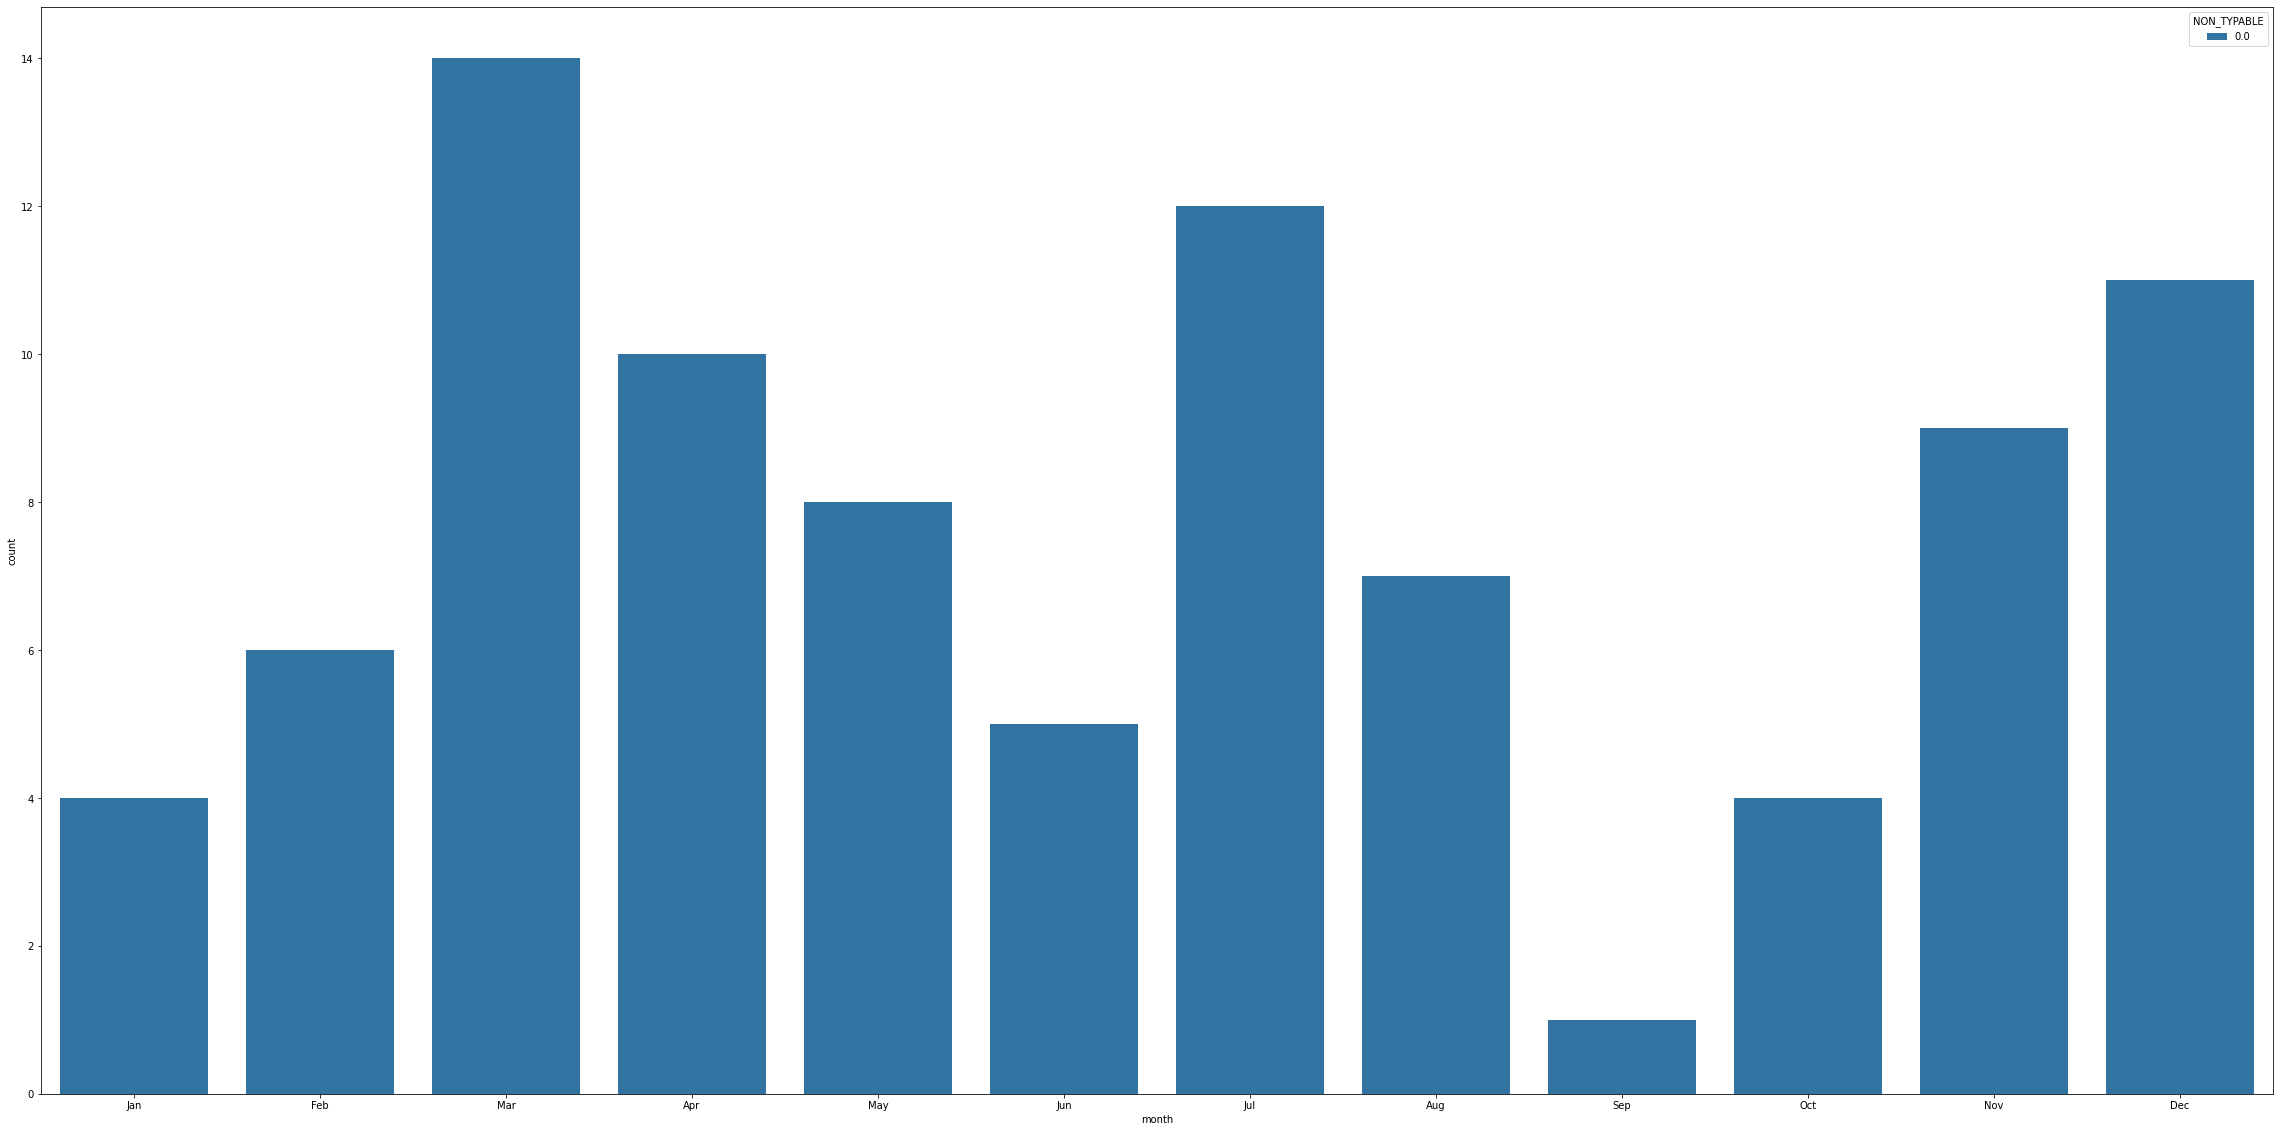

In [89]:
sns.countplot(x='month',hue='NON_TYPABLE',data=df3)